In [214]:
# Logistical Regression Classification focusing on CMCSA

# project-1/dsci-511/data/social_media_sentiment.csv a month of data with a skip and a week

# one example, import social media sentiment of the last one month focused on twitter_score and sum up the hours into a day of twitter_score and if its positive we lable it positive for that day


import finnhub
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sb
from datetime import date, datetime, timedelta

# Setup finnhub client - https://finnhub.io/docs/api/
finnhub_client = finnhub.Client(api_key='cd4oqiaad3i98jhu2pggcd4oqiaad3i98jhu2ph0')

today_date = date.today()
from_unix_time = int(time.mktime((today_date - timedelta(weeks = 52)).timetuple()))
to_unix_time = int(time.mktime(today_date.timetuple()))

In [195]:
# Retrieve Stock Candlestick Data
def retrieve_candlestick_data_frame(ticker_symbol):
    candle_response = finnhub_client.stock_candles(symbol=ticker_symbol, resolution='D', _from=from_unix_time, to=to_unix_time)

    candles = pd.json_normalize(candle_response)[['t', 'o', 'c', 'h', 'l', 'v']]

    candles_df = pd.DataFrame(columns=['date','unix_time', 'open', 'close', 'high', 'low', 'volume'])
    candles_df['date'] = pd.to_datetime(candles['t'][0],unit='s').astype(str)
    candles_df['year'] = pd.to_datetime(candles['t'][0],unit='s').year
    candles_df['unix_time'] = candles['t'][0]
    candles_df['open'] = candles['o'][0]
    candles_df['close'] = candles['c'][0]
    candles_df['high'] = candles['h'][0]
    candles_df['low'] = candles['l'][0]
    candles_df['volume'] = candles['v'][0]
    
    return candles_df

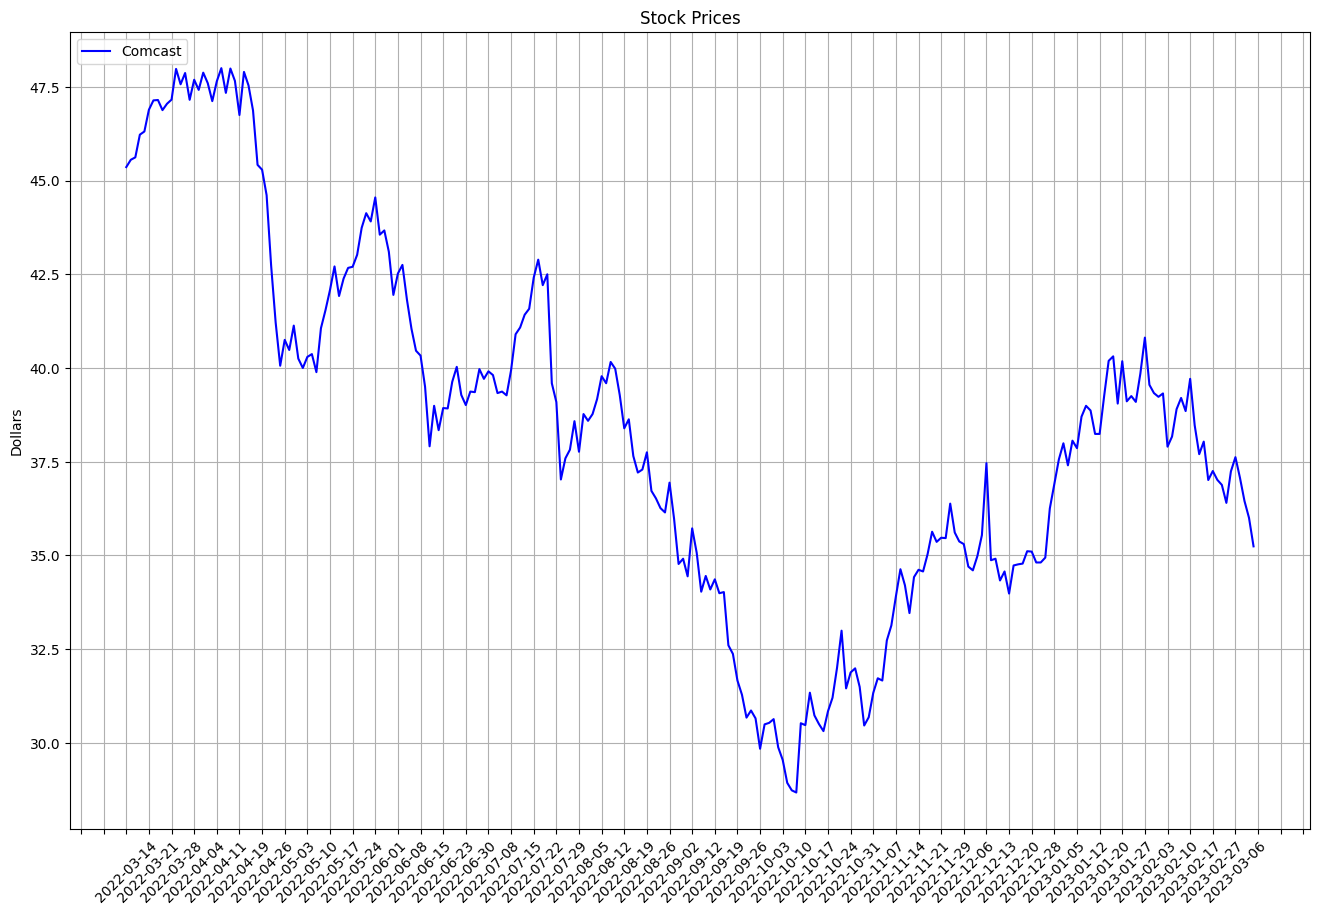

In [196]:
comcast_candles_df = retrieve_candlestick_data_frame('CMCSA')

# set figure and subplot size to 4 x 4, start from 0,0 to row 3
fig = plt.figure(figsize=(16,14),dpi=100)
line_plot = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)

line_plot.plot(comcast_candles_df['date'], comcast_candles_df['open'], label='Comcast', c='b')
line_plot.grid(True)
line_plot.set_title("Stock Prices")
line_plot.set_ylabel("Dollars")
line_plot.xaxis.set_major_locator(mticker.MultipleLocator(5))

plt.legend(loc=2) # set legend to upper left

for tick in line_plot.get_xticklabels():
    tick.set_rotation(45)

In [197]:
import numpy as np

ticker_symbol = 'CMCSA'

# import Social Media for CMCSA and stock price (candlestick_data.csv)
social_Media_csv_file_path = './dsci-511/data/social_media_sentiment.csv'
social_media_df = pd.read_csv(social_Media_csv_file_path, header = 0)
#print(social_media_df.loc[ticker_symbol])
comcast_social_df = social_media_df[social_media_df['symbol'] == 'CMCSA']
#print(comcast_social_df.head())


# sum twitter_score up per day, passing weekend values to Monday (new colum split atTime?)
#comcast_social_df['date'] = 
comcast_social_df['day'] =  pd.to_datetime(comcast_social_df['atTime']).dt.date
#print(comcast_social_df.head())
#print(comcast_social_df.columns)

social_sum = comcast_social_df.groupby('day', as_index=False)[['score_twitter']].sum() # normalize after taking sum for outside of 1, -1 range
#print(social_sum['score_twitter'])

normalized_social_data = social_sum.copy()
#print(normalized_social_Data.loc[:,'score_twitter'])


normalized_social_data['normalized'] = normalized_social_data.loc[:,'score_twitter']/np.linalg.norm(normalized_social_data.loc[:,'score_twitter'])
  
# normalized data using linalg.norm
print(normalized_social_data)

#normalizedData = (social_sum.loc[:,'score_twitter']-np.min(social_sum.loc[:,'score_twitter']))/(np.max(social_sum.loc[:,'score_twitter'])-np.min(social_sum.loc[:,'score_twitter']))

#print(normalizedData)


           day  score_twitter  normalized
0   2022-12-02       1.946495    0.061818
1   2022-12-03       8.029816    0.255018
2   2022-12-04      -1.378237   -0.043771
3   2022-12-05      -7.518499   -0.238779
4   2022-12-06      -0.805690   -0.025588
5   2022-12-07      -0.165637   -0.005260
6   2023-02-08       1.477189    0.046914
7   2023-02-09       0.731893    0.023244
8   2023-02-10       3.746666    0.118990
9   2023-02-12      -0.114444   -0.003635
10  2023-02-13      -1.767353   -0.056129
11  2023-02-14      -5.501467   -0.174720
12  2023-02-15      -3.665886   -0.116424
13  2023-02-16      -3.433189   -0.109034
14  2023-02-17      -1.778648   -0.056488
15  2023-02-18      -2.471173   -0.078482
16  2023-02-19      -3.077669   -0.097743
17  2023-02-20      -3.293571   -0.104600
18  2023-02-21       2.254171    0.071590
19  2023-02-22      -1.526552   -0.048481
20  2023-02-23       2.196453    0.069757
21  2023-02-24      -1.426293   -0.045297
22  2023-02-25       2.641107    0

/var/folders/b5/3z6b1z0d6zzb7zcxdwj4x6000000gq/T/ipykernel_25749/3170352092.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comcast_social_df['day'] =  pd.to_datetime(comcast_social_df['atTime']).dt.date


In [209]:
ticker_symbol = 'CMCSA'

# import Social Media for CMCSA and stock price (candlestick_data.csv)
candle_csv_file_path = './dsci-511/data/candlestick_data.csv'
daily_stock_df = pd.read_csv(candle_csv_file_path, header = 0)
#print(social_media_df.loc[ticker_symbol])
comcast_daily_stock_df = daily_stock_df[daily_stock_df['symbol'] == 'CMCSA']

print(comcast_daily_stock_df.head())
print(comcast_daily_stock_df.tail())
print(len(comcast_daily_stock_df))
print(len(normalized_social_Data))

     symbol        date   unix_time   open  close   high     low    volume
3469  CMCSA  2023-03-15  1678838400  35.03  35.47  35.74  34.630   7552134
3470  CMCSA  2023-03-14  1678752000  35.98  35.28  36.01  34.930  27424270
3471  CMCSA  2023-03-13  1678665600  35.30  35.51  35.95  34.940  22182130
3472  CMCSA  2023-03-10  1678406400  35.24  35.31  35.58  34.990  20414482
3473  CMCSA  2023-03-09  1678320000  36.00  35.47  36.13  35.325  14273827
     symbol        date   unix_time     open  close     high     low    volume
3784  CMCSA  2021-12-10  1639094400  48.2768  48.45  48.5100  47.780  27865400
3785  CMCSA  2021-12-09  1639008000  48.6670  47.81  48.8150  47.590  35048216
3786  CMCSA  2021-12-08  1638921600  49.2700  48.94  49.8401  48.590  36605541
3787  CMCSA  2021-12-07  1638835200  52.3000  49.58  53.1900  48.715  46086870
3788  CMCSA  2021-12-06  1638748800  52.2000  52.35  53.3150  52.060  22334402
320
38


In [199]:
ticker_symbol = 'CMCSA'

# import Social Media for CMCSA and stock price (candlestick_data.csv)
buy_sell_csv_file_path = './dsci-511/data/candlestick_data.csv'
daily_stock_df = pd.read_csv(candle_csv_file_path, header = 0)
#print(social_media_df.loc[ticker_symbol])
comcast_daily_stock_df = daily_stock_df[daily_stock_df['symbol'] == 'CMCSA']

print(comcast_daily_stock_df.head())
print(comcast_daily_stock_df.tail())
print(len(comcast_daily_stock_df))
print(len(normalized_social_data))

     symbol        date   unix_time   open  close    high     low    volume
3421  CMCSA  2023-03-09  1678320000  36.00  35.47  36.130  35.325  14225945
3422  CMCSA  2023-03-08  1678233600  36.45  35.90  36.470  35.610  17450058
3423  CMCSA  2023-03-07  1678147200  37.07  36.19  37.210  35.935  20070087
3424  CMCSA  2023-03-06  1678060800  37.62  37.08  37.625  37.015  12422130
3425  CMCSA  2023-03-03  1677801600  37.24  37.23  37.390  37.000  16776905
     symbol        date   unix_time     open  close     high     low    volume
3732  CMCSA  2021-12-10  1639094400  48.2768  48.45  48.5100  47.780  27865400
3733  CMCSA  2021-12-09  1639008000  48.6670  47.81  48.8150  47.590  35048216
3734  CMCSA  2021-12-08  1638921600  49.2700  48.94  49.8401  48.590  36605541
3735  CMCSA  2021-12-07  1638835200  52.3000  49.58  53.1900  48.715  46086870
3736  CMCSA  2021-12-06  1638748800  52.2000  52.35  53.3150  52.060  22334402
316
38


In [200]:
## Needs works to exclude/sum up holidys/weekends in social media to match daily stock info 

import pandas as pd



count = 0
for day in normalized_social_data['day']:
    print('1',day)
    d = pd.Timestamp(day)
    print(d.dayofweek, d.day_name())
    if comcast_daily_stock_df.loc[comcast_daily_stock_df['date'] == day]:
    #if day not in comcast_daily_stock_df['date']:
        print('2',d.day_name())
        count += 1
print(len(comcast_daily_stock_df))
print(len(normalized_social_data))
print(count)  
#d = pd.Timestamp('2022-05-02')
#print(d.dayofweek, d.day_name())

1 2022-12-02
4 Friday


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
print("test")

In [ ]:
comcast_daily_stock_df['Date'] = pd.to_datetime(comcast_daily_stock_df['Date'])
normalized_social_data['Date'] = pd.to_datetime(normalized_social_data['Date'])
start_date = normalized_social_data['Date'].min()
end_date = normalized_social_data['Date'].max()
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
missing_dates = set(all_dates) - set(comcast_daily_stock_df['Date'])
print(missing_dates)

KeyError: 'Date'

In [ ]:

from sklearn.preprocessing import MinMaxScaler


def normalize_featuresDF(df):
    """
    created to normalize df data - range between 0-1
    args:
    df : the data we pulled up from yahoo for the stock
    return: normalized_features_df : data after it is normalized
    """
    scaler = MinMaxScaler()
    feature_columns = df.columns
    feature_minmax_data = scaler.fit_transform(df)
    normalized_features_df = pd.DataFrame(columns=feature_columns, data=feature_minmax_data, index=df.index)
    
    return normalized_features_df

In [ ]:

normalized_daily_stock_price = normalize_featuresDF(comcast_daily_stock_df['close'])
print(normalized_daily_stock_price)

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
normalized_stock_data = comcast_daily_stock_df.copy()
#print(normalized_social_Data.loc[:,'score_twitter'])


normalized_stock_data['normalized'] = normalized_stock_data.loc[:,'close']/np.linalg.norm(normalized_stock_data.loc[:,'close'])

normalized_stock_data['normalized2'] = normalized_stock_data.loc[-38:,'close']/np.linalg.norm(normalized_stock_data.loc[-38:,'close'])
normal_38_day_stock = np.empty(38,)
normal_38_day_stock['normalized'] = (normalized_stock_data.loc[-38:,'close']/np.linalg.norm(normalized_stock_data.loc[-38:,'close']))
# normalized data using linalg.norm
print(normalized_stock_data["close"].iloc[38:])
print(len(normalized_stock_data["close"].iloc[-38:]))
print(normalized_stock_data["close"].iloc[-38:].shape)

normalized_stock_data_np = np.array(normalized_stock_data["normalized"].iloc[-38:])
normalized_stock_data_np_2 = np.array(normalized_stock_data["normalized2"].iloc[-38:])
print(normalized_stock_data_np.shape)
normalized_stock_data_np.reshape(1, -1)
print(normalized_stock_data_np.shape)

print(normal_38_day_stock)
print(normal_38_day_stock.shape)


#print(normalized_stock_data.iloc[4[30:]])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
social_labels = []

for score in normalized_social_data['normalized']:
    if score >= 0:
        social_labels.append(1)
    else:
        social_labels.append(0)
        
print(social_labels)
print(len(social_labels))

 
# converting list to array
social_labels_np = np.array(social_labels)
social_labels_np.reshape(1, -1)

print(social_labels_np.shape)
print(social_labels_np)

print(len(normalized_stock_data[-38:]))


[1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
38
(38,)
[1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1]
38


In [ ]:
print([normalized_stock_data_np])
print(normalized_stock_data_np)

[array([0.06815967, 0.06581548, 0.06643237, 0.06809113, 0.06863948,
       0.06817338, 0.06884511, 0.0689959 , 0.06879027, 0.07084658,
       0.07029823, 0.06984584, 0.07010631, 0.06925637, 0.06861206,
       0.06924266, 0.06884511, 0.06880398, 0.06955796, 0.0689959 ,
       0.06935233, 0.06935233, 0.06924266, 0.06918782, 0.06858464,
       0.06721377, 0.06698072, 0.06635012, 0.06682993, 0.06695331,
       0.06604853, 0.06684364, 0.06540422, 0.06641867, 0.06554131,
       0.06709039, 0.06796775, 0.07176506])]
[0.06815967 0.06581548 0.06643237 0.06809113 0.06863948 0.06817338
 0.06884511 0.0689959  0.06879027 0.07084658 0.07029823 0.06984584
 0.07010631 0.06925637 0.06861206 0.06924266 0.06884511 0.06880398
 0.06955796 0.0689959  0.06935233 0.06935233 0.06924266 0.06918782
 0.06858464 0.06721377 0.06698072 0.06635012 0.06682993 0.06695331
 0.06604853 0.06684364 0.06540422 0.06641867 0.06554131 0.06709039
 0.06796775 0.07176506]


In [ ]:
from sklearn.model_selection import train_test_split
#update TDM and labels

train, test, train_labels, test_labels = train_test_split(normalized_stock_data_np,  social_labels_np, train_size=0.75, test_size=0.25, random_state=0)

In [ ]:
from xgboost import XGBClassifier

logistic_social_media_sentiment = XGBClassifier()

In [205]:
comcast_daily_stock_df.iloc[:,-5:]
new_df['date'] = comcast_daily_stock_df['date']

3421    2023-03-09
3422    2023-03-08
3423    2023-03-07
3424    2023-03-06
3425    2023-03-03
           ...    
3732    2021-12-10
3733    2021-12-09
3734    2021-12-08
3735    2021-12-07
3736    2021-12-06
Name: date, Length: 316, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score


logistic_social_media_sentiment = LogisticRegression(solver='lbfgs', max_iter=1000)

print(train.reshape(-1, 1), train_labels)

print(train.shape, train_labels.shape)

logistic_social_media_sentiment.fit(train.reshape(-1, 1), train_labels)

print(test)
print(test.shape)

predictions = logistic_social_media_sentiment.predict(test.reshape(-1, 1))

score = accuracy_score(predictions, test_labels)

print(f"Accuracy score: {score}")
print(f"Precision: {precision_score(predictions, test_labels)}")
print(f"Recall: {recall_score(predictions, test_labels)}")
print(f"F1: {f1_score(predictions, test_labels)}")

[[0.06684364]
 [0.06641867]
 [0.06540422]
 [0.07176506]
 [0.06709039]
 [0.06604853]
 [0.06554131]
 [0.06879027]
 [0.06925637]
 [0.06817338]
 [0.06880398]
 [0.06861206]
 [0.0689959 ]
 [0.06682993]
 [0.06581548]
 [0.07010631]
 [0.06635012]
 [0.06858464]
 [0.06884511]
 [0.06918782]
 [0.06863948]
 [0.06955796]
 [0.06935233]
 [0.0689959 ]
 [0.07084658]
 [0.06796775]
 [0.06809113]
 [0.06815967]] [0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1]
(28,) (28,)
[0.06924266 0.06695331 0.06884511 0.06924266 0.06984584 0.06935233
 0.06698072 0.07029823 0.06721377 0.06643237]
(10,)
Accuracy score: 0.8
Precision: 0.0
Recall: 0.0
F1: 0.0


/Users/rbhatt200/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [257]:
print(comcast_daily_stock_df.info())
print(comcast_daily_stock_df.shape,"\n\nNull Check:")
print(comcast_daily_stock_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 3469 to 3788
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     320 non-null    object 
 1   date       320 non-null    object 
 2   unix_time  320 non-null    int64  
 3   open       320 non-null    float64
 4   close      320 non-null    float64
 5   high       320 non-null    float64
 6   low        320 non-null    float64
 7   volume     320 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 30.6+ KB
None
(320, 8) 

Null Check:
symbol       0
date         0
unix_time    0
open         0
close        0
high         0
low          0
volume       0
dtype: int64


In [246]:
print(comcast_daily_stock_df.describe())


          unix_time        open       close        high         low  \
count  3.200000e+02  320.000000  320.000000  320.000000  320.000000   
mean   1.658736e+09   40.525663   40.515062   41.029222   40.031678   
std    1.162039e+07    6.083512    6.096719    6.156031    6.050199   
min    1.638749e+09   28.672000   28.680000   29.150000   28.390000   
25%    1.648663e+09   35.592500   35.585000   36.032500   35.230000   
50%    1.658837e+09   39.525000   39.735000   40.085000   39.090000   
75%    1.668578e+09   46.757500   46.647500   47.142500   46.083750   
max    1.678838e+09   52.300000   52.350000   53.315000   52.060000   

             volume  
count  3.200000e+02  
mean   2.381379e+07  
std    8.095525e+06  
min    7.552134e+06  
25%    1.805937e+07  
50%    2.186103e+07  
75%    2.831240e+07  
max    6.886219e+07  


/var/folders/b5/3z6b1z0d6zzb7zcxdwj4x6000000gq/T/ipykernel_25749/4274119772.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


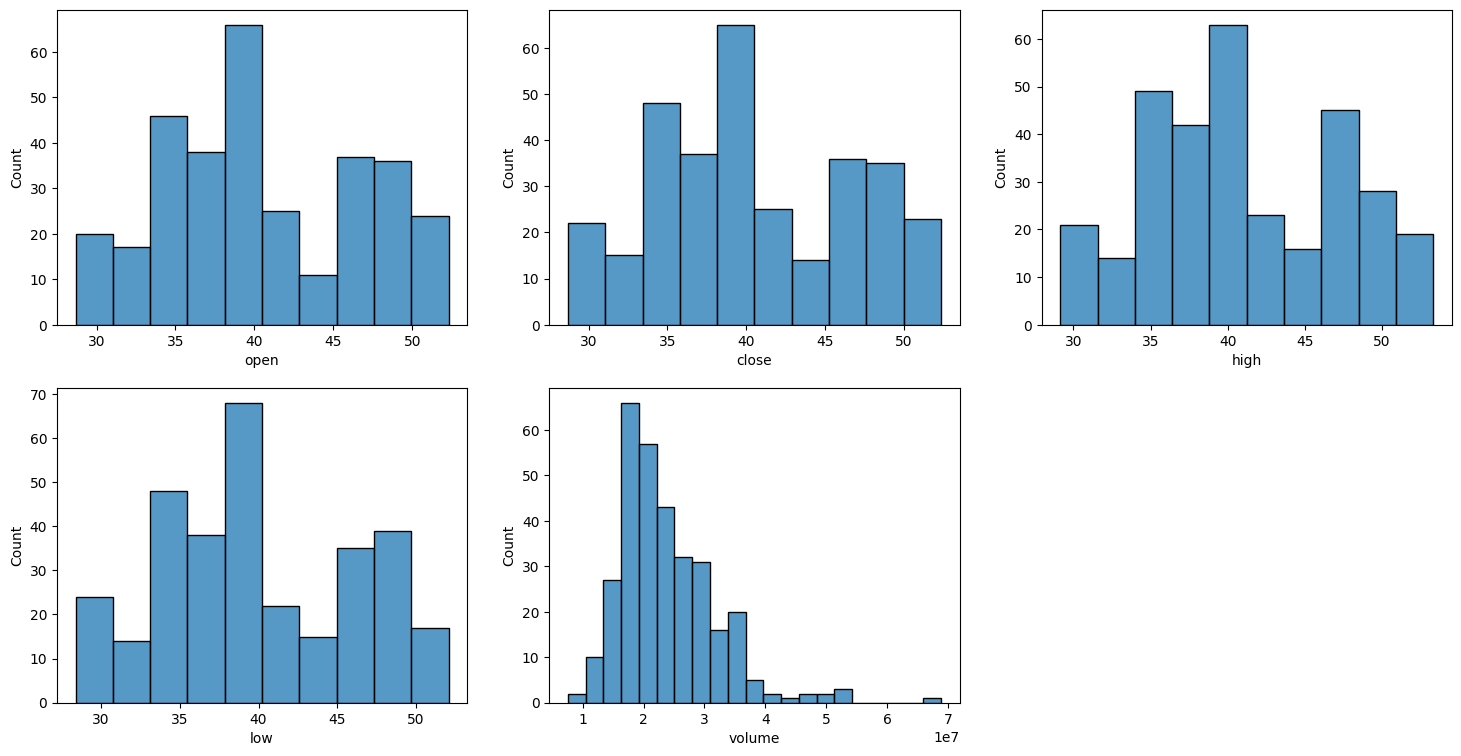

In [224]:
features = ['open', 'close', 'high', 'low', 'volume']
 
plt.subplots(figsize=(18,9))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.histplot(comcast_daily_stock_df[col])
plt.show()


/var/folders/b5/3z6b1z0d6zzb7zcxdwj4x6000000gq/T/ipykernel_25749/250706080.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,5,i+1)


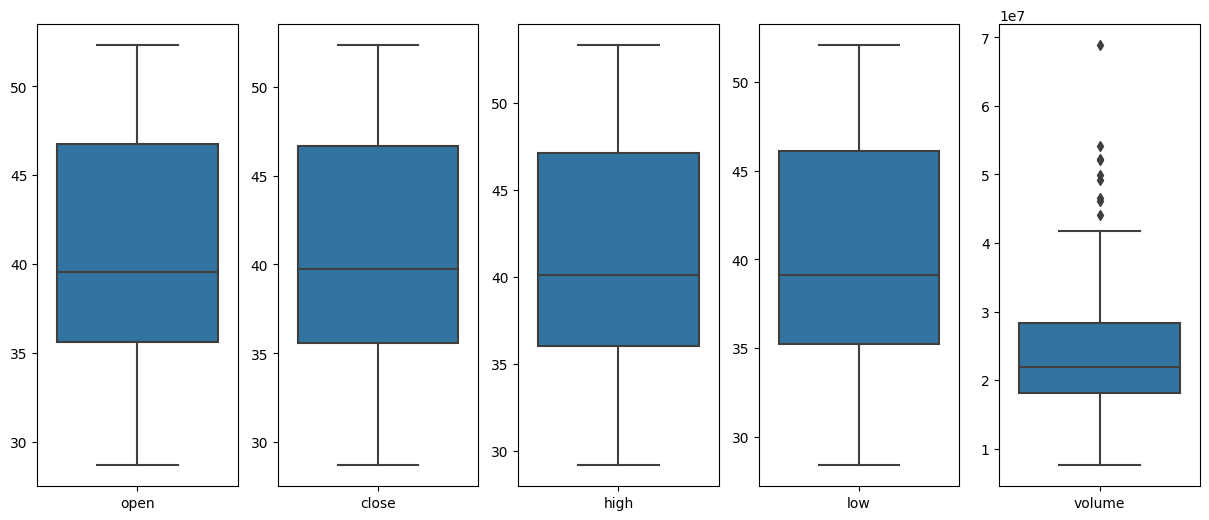

In [241]:

plt.subplots(figsize=(15,6))
for i, col in enumerate(features):
  plt.subplot(1,5,i+1)
  sb.boxplot(comcast_daily_stock_df[[col]])
plt.show()

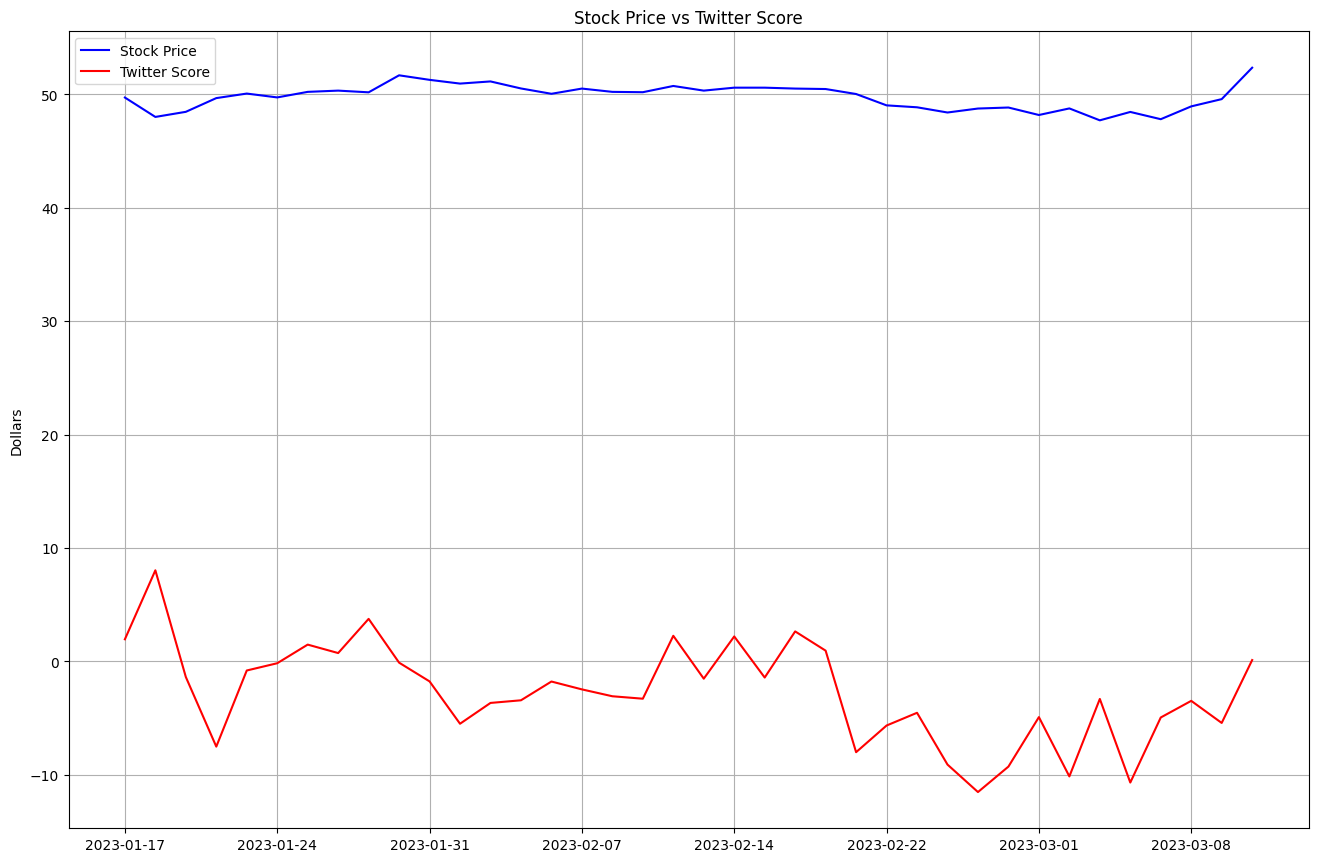

In [ ]:
fig = plt.figure(figsize=(16,14),dpi=100)
line_plot = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)

#line_plot.plot(comcast_candles_df['date'][-38:], normalized_stock_data["close"].iloc[-38:], label='Stock Price', c='b')
line_plot.plot(comcast_candles_df['date'][-38:], normalized_stock_data['close'][-38:], label='Stock Price', c='b')

line_plot.plot(comcast_candles_df['date'][-38:], normalized_social_data['score_twitter'], label='Twitter Score', c='r')
line_plot.grid(True)
line_plot.set_title("Stock Price vs Twitter Score")
line_plot.set_ylabel("Dollars")
line_plot.xaxis.set_major_locator(mticker.MultipleLocator(5))

plt.legend(loc=2) 